In [1]:
%pylab inline
import json
import pandas as pd

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
results_file = "../results/experiment_only_population_ER.json"

In [3]:
results = pd.read_json(results_file, orient='records', lines=True)
results.head()

,network_params,init_opinions_params,init_confidence_params,init_alpha_experts_params,tau,N,frac_experts,n_simul,seed,converged,total_steps,time_elapsed,rmsd_truth_a,rmsd_truth_e,rmsd_truth_all
0,ER_10,uniform,const_0.05,const_0.05,0,1000,0,2,3,False,301,33.186390,0.565516,NaN,0.565516
1,ER_10,uniform,const_0.05,const_0.05,0,1000,0,0,1,False,301,33.914470,0.570593,NaN,0.570593
2,ER_10,uniform,const_0.05,const_0.05,0,1000,0,3,4,False,301,33.961185,0.570866,NaN,0.570866
3,ER_10,uniform,const_0.05,const_0.05,0,1000,0,1,2,False,301,34.125153,0.568685,NaN,0.568685
4,ER_10,uniform,const_0.05,const_0.05,0,1000,0,4,5,False,301,33.065768,0.565102,NaN,0.565102


In [4]:
res = []
for group, rows in results.groupby(list(results.columns[:7])):
    
    k_mean = int(group[0].split("_")[1])
    confid = float(group[2].split("_")[1])
    alpha = float(group[3].split("_")[1])
    tau = float(group[4])
    N = int(group[5])
    frac_exp = float(group[6])
    
    rmds_final_mean = rows.rmsd_truth_all.mean()
    rmds_final_std = rows.rmsd_truth_all.std()
    steps_end_mean = rows.total_steps.mean()
    steps_end_std = rows.total_steps.std()
    
    res.append([k_mean, confid, alpha, tau, N, frac_exp, rmds_final_mean, rmds_final_std,
               steps_end_mean, steps_end_std])
    
    
res = pd.DataFrame(res, columns=['k_mean', 'confid', 'alpha', 'tau', 'N', 'frac_exp', 
                                 'rmds_final_mean', 'rmds_final_std',
                                'steps_end_mean', 'steps_end_std'])
res.head()

,k_mean,confid,alpha,tau,N,frac_exp,rmds_final_mean,rmds_final_std,steps_end_mean,steps_end_std
0,10,0.05,0.05,0.0,1000,0.0,0.574054,0.008305,301.00,0.000000
1,10,0.10,0.05,0.0,1000,0.0,0.550225,0.010947,294.50,37.160449
2,10,0.15,0.05,0.0,1000,0.0,0.535150,0.015741,246.55,99.288008
3,10,0.20,0.05,0.0,1000,0.0,0.502605,0.014008,124.54,122.211476
4,10,0.25,0.05,0.0,1000,0.0,0.501196,0.011744,63.90,96.149662


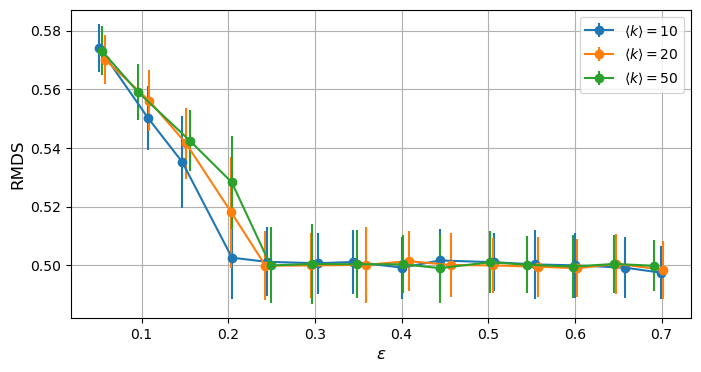

In [6]:
plt.figure(figsize=(8,4))
for k_mean, rows in res.groupby('k_mean'):
    
    rows = rows.sort_values('confid')
    
    dx = np.random.random(rows.shape[0]) * 0.02 - 0.01
    plt.errorbar(rows.confid + dx, rows.rmds_final_mean, rows.rmds_final_std, fmt='o-', 
                 label=fr"$\left< k \right>={k_mean}$")
    
plt.legend()
plt.xlabel(r"$\epsilon$", fontsize=12)
plt.ylabel(r"RMDS", fontsize=12)
plt.grid()

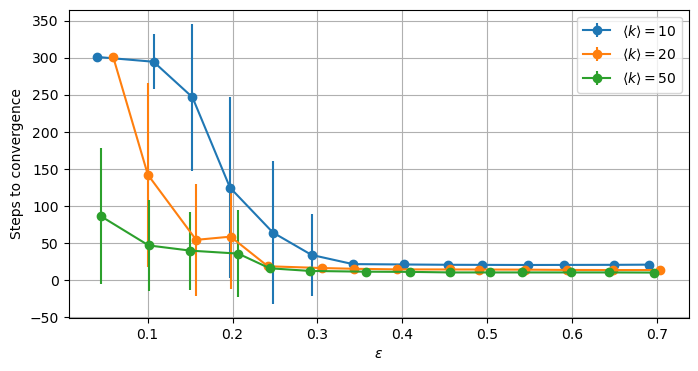

In [7]:
plt.figure(figsize=(8,4))
for k_mean, rows in res.groupby('k_mean'):
    
    rows = rows.sort_values('confid')
    
    dx = np.random.random(rows.shape[0]) * 0.02 - 0.01
    plt.errorbar(rows.confid + dx, rows.steps_end_mean, rows.steps_end_std, fmt='o-', 
                 label=fr"$\left< k \right>={k_mean}$")
    
plt.legend()
plt.xlabel(r"$\epsilon$")
plt.ylabel(r"Steps to convergence")
plt.grid()